In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Why we do EDA
- Model building(requires understanding of data so can make better predicting models)
- Analysis and reporting(sales report and getting insights for reasons of loss)
- Validates assumptions based on the sample provided as dataset
- Handling missing values(analyse data to replace missing values with the best possible replacement on the basis of other variables or columns giving in the dataset)
- Feature engineering(deciding which columns will help in prediction or do we need to make another column etc)
- Detecting outliers

EDA is an iterative process

### Categorize columns based on below column type
- Numerical(age,fare)
- Categorical(branch name,gender)
- Mixed(name)

### Univariate analysis
Univariate focus on analyzing each feature(variable or column) in the dataset independently
- **Distribution analysis:** The distribution of each feature is examined to identify its shape,central tendency and dispersion
- **Identifying potential issue:** Univariate analysis helps identifies problems such as outliers,skewness(causes problem in testing because data is not normally distributed),missing values

### Steps of univariate analysis on numerical columns
- **Descriptive statistics**: Compute mean,median,mode,standard deviation,range and quartiles.These give a general understanding of data and help identify skewness and outliers
- **Visualization**: Create graphs to explore distribution.Box plot,histogram,density plot.Can help identifying skewness and outliers
- **Identifying outliers**: Identify and examine outliers in data.Outliers can be identified using visualization.it is important to determine whether they are due to measurement errors,data entry error or legitimate differences in data and to decide whether to include or exclude them from analysis
- **Skewness**: Check for skewness in data and consider transforming the data
- **Conclusion**: Summarize the findings of EDA and make decision how to proceed with further analysis

In [2]:
df=pd.read_csv('./datasets/titanic.csv')

In [8]:
df.head(3)
# passenger id is useless

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

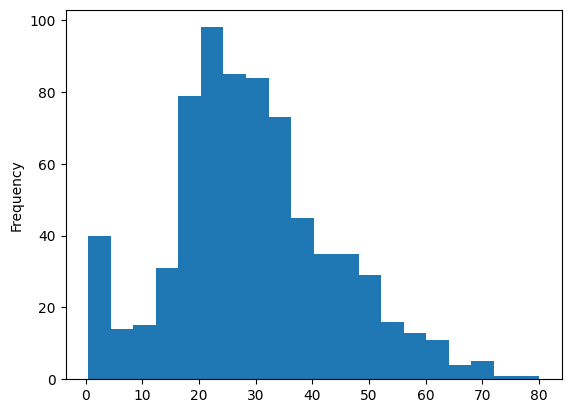

In [13]:
df['Age'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

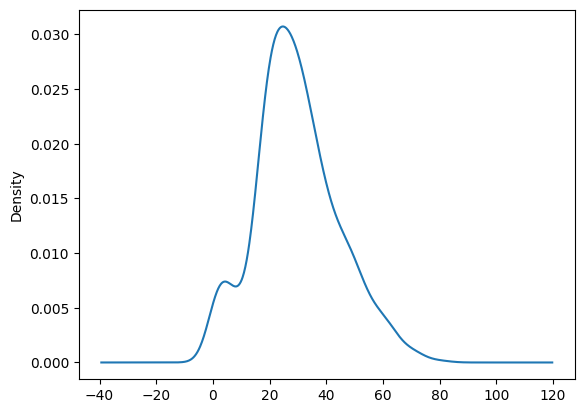

In [15]:
df['Age'].plot(kind='kde') # distribution of data

In [17]:
df['Age'].skew() # closer to zero means normally distributed

0.38910778230082704

<Axes: >

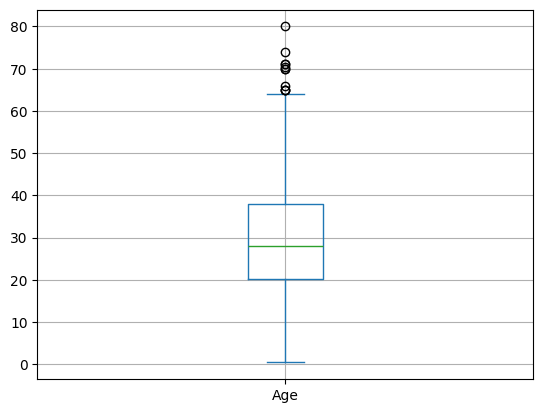

In [19]:
df['Age'].plot(kind='box',grid=True) # helps to check if there are outliers

In [20]:
df[df['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [23]:
(df['Age'].isnull().sum()/len(df['Age']))*100 # missing values in percentage/ratio

19.865319865319865

In [24]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

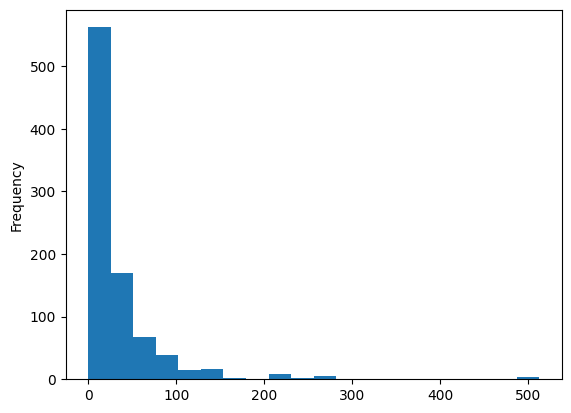

In [26]:
df['Fare'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

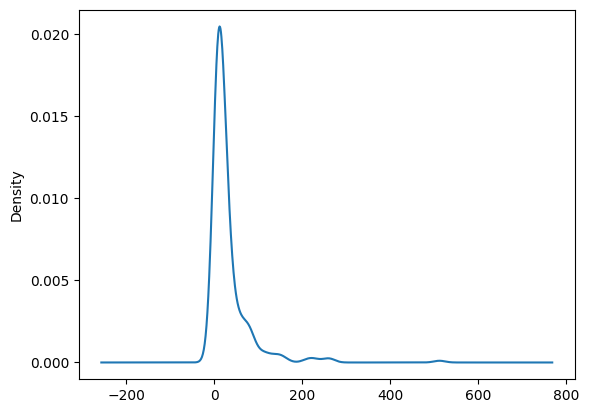

In [27]:
df['Fare'].plot(kind='kde')

In [28]:
df['Fare'].skew() # highly positively skewed

4.787316519674893

<Axes: >

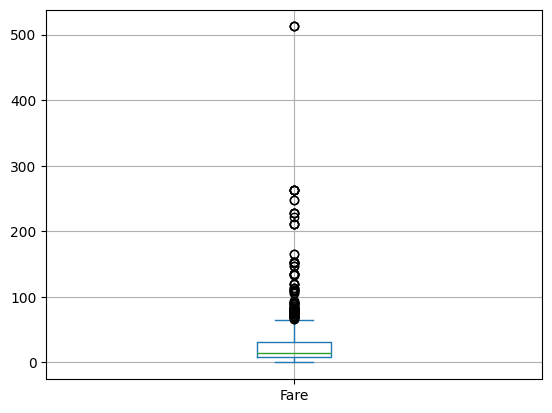

In [30]:
df['Fare'].plot(kind='box',grid=True)

In [34]:
df[df['Fare']>250] # by analyzing the duplicate fares we got to know that fare column is of combined fare of whole family or group which contradict our assumption that the fare is individual

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [35]:
df['Fare'].isnull().sum()

0

### Steps of univariate analysis on categorical columns
- **Descriptive statistics**: Compute frequency distribution of categories in the column.These give a general understanding of data and help identify skewness and outliers
- **Visualization**: Create graphs to explore distribution.Count plot and pie charts.Can help identifying frequency distribution of categories and any patterns or anomalies(98 males and 2 females-imbalanced data) in data
- **Identifying outliers**: Identify and examine outliers in data.Outliers can be identified using visualization.it is important to determine whether they are due to measurement errors,data entry error or legitimate differences in data and to decide whether to include or exclude them from analysis
- **Conclusion**: Summarize the findings of EDA and make decision how to proceed with further analysis

In [38]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

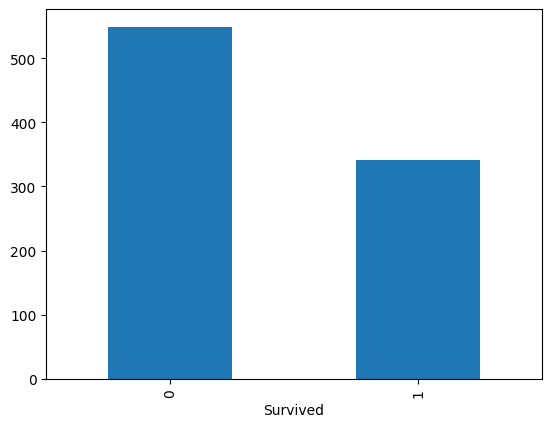

In [41]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

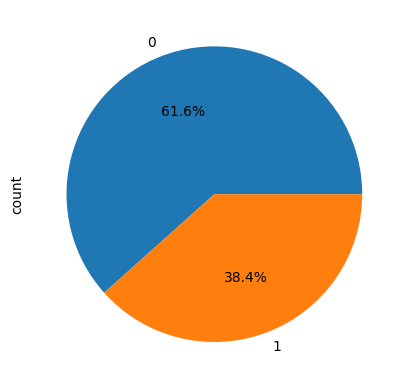

In [44]:
df['Survived'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [45]:
df['Survived'].isnull().sum()

0

In [47]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

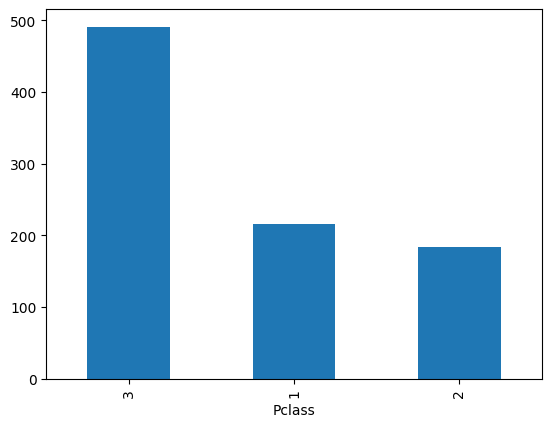

In [48]:
df['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

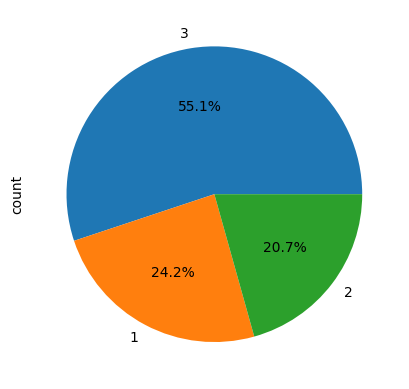

In [49]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [52]:
df['Pclass'].isnull().sum()

0

In [51]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

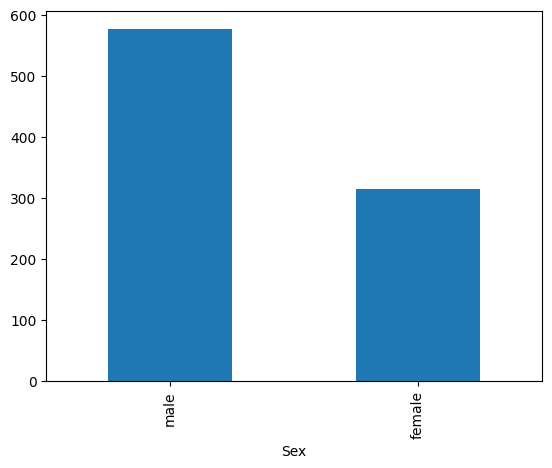

In [53]:
df['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

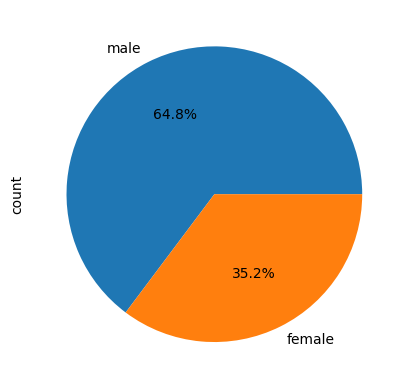

In [54]:
df['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [55]:
df['Sex'].isnull().sum()

0

In [58]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [60]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

### SibSp and Parch
#### Conclusions:
- SibSp and Parch can be combined to one column because both are included in famili
- Another categorical column can be made giving info if passenger was travelling alone or with family members

<Axes: ylabel='count'>

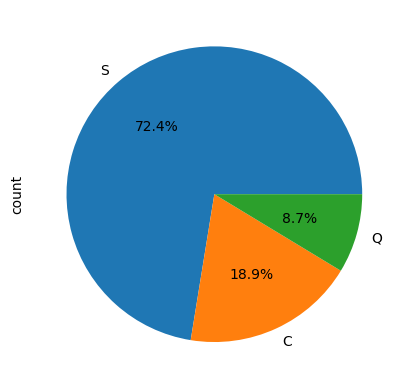

In [63]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

### Age
#### Conclusions:
- Age is almost normally distributed
- 20% values are missing
- There are some outlier
### Fare
#### Conclusions:
- Data is highly positively skewed
- By analyzing the duplicate fares we got to know that fare column is of combined fare of whole family or group which contradict our assumption that the fare is individual.This might be an issue and we might need to create another column as individual fare which is part of feature engineering
### Pclass
#### Conclusions:
- Less people travelled in Pclass 1 than Pclass 2 which creates confusion and can be resolved by bivariate analysis of Pclass and Fare
### Mixed columns
#### Conclusions:
- Need to feature engineer mixed columns to use for analysis

### Steps of bivariate analysis
- Select 2 columns
- Understand type of relationship
    1. Numerical - Numerical
        - You can plot graphs like scatterplot(regression plots),2d hist,2d kde plot
        - Check correlation coefficient to check relationship
    2. Numerical - Categorical
        - Create visualization that compare distribution of numerical data across different categories of categorical data
        - Bar,box.kde,violin plot and scatter plot
    3. Categorical - Categorical
        - You cretae cross tabulations or contingency that show distribution of values in one categorical column,grouped by the values in other categorical columns
        - Heatmap,stacked bar plot,treemaps
- Write conclusions

Use the most important column(survived as in this case) and start with that column by creating combinations with it

In [66]:
pd.crosstab(df['Survived'],df['Pclass']) # contengency table

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [70]:
pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

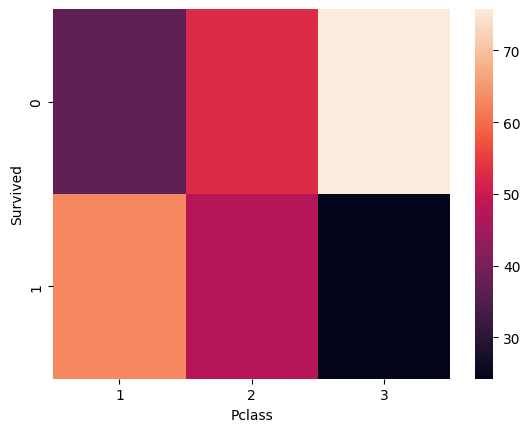

In [71]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100)

In [72]:
pd.crosstab(df['Survived'],df['Sex']) # contengency table

Sex,female,male
Survived,,
0,81,468
1,233,109


In [75]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


<Axes: xlabel='Sex', ylabel='Survived'>

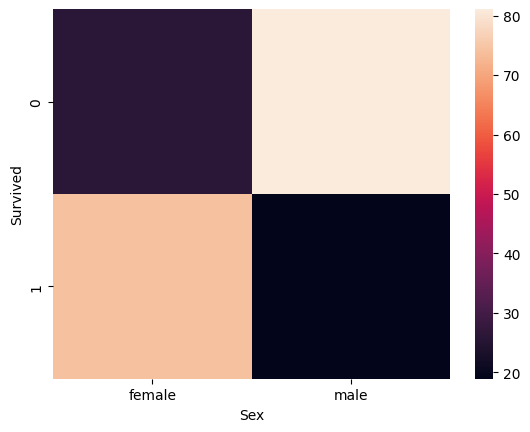

In [74]:
sns.heatmap(pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100)

In [80]:
pd.crosstab(df['Survived'],df['Embarked']) # contengency table

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [81]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


<Axes: xlabel='Embarked', ylabel='Survived'>

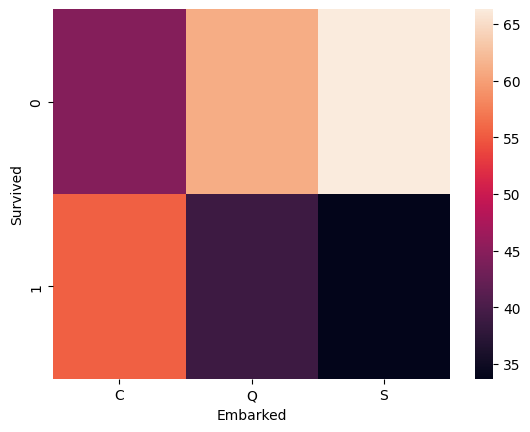

In [82]:
sns.heatmap(pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100)

In [85]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')*100 # reason for higher survival of people embarked from C was bacause they travelled in Pclass(they maybe more rich)

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


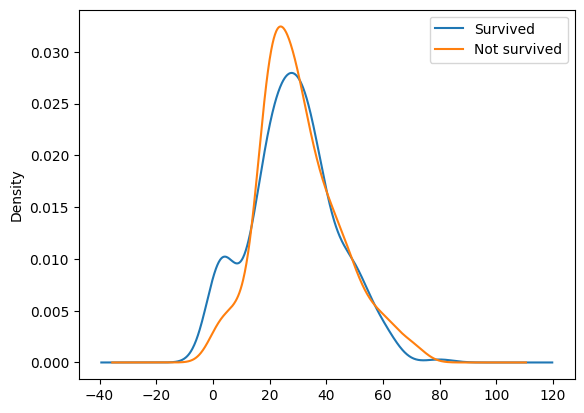

In [89]:
# relationship between survived and age
df[df['Survived']==1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived']==0]['Age'].plot(kind='kde',label='Not survived')
plt.legend()
plt.show()

### Feature engineering:
- Siblings,spouse and parent,child
- Individual fares

In [91]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [94]:
df[df['Ticket']=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [98]:
df[df['Name'].str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


### Feature Engineering:

In [5]:
df1=pd.read_csv('./datasets/test - test.csv')

In [9]:
# using SibSp Parch to calculate actual individual fare
df1[df1['Ticket']=='CA. 2343'] # remaining 4 members

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
188,1080,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S
365,1257,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.55,NaN,S


In [11]:
df2=pd.concat([df,df1])

In [13]:
df2['Ticket'].value_counts()

Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: count, Length: 929, dtype: int64

In [14]:
df2[df2['Ticket']=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [16]:
df2['Individual_fare']=df2['Fare']/(df2['SibSp']+df2['Parch']+1)
df2.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000


<Axes: >

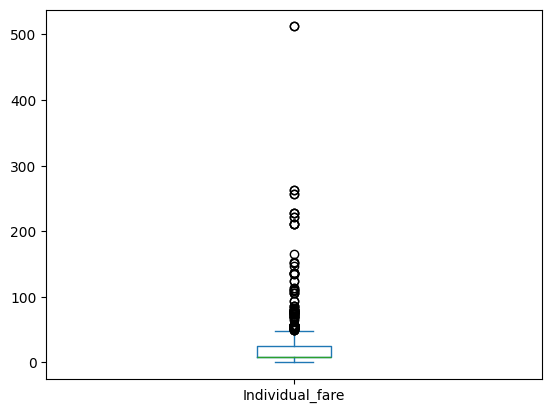

In [20]:
df2['Individual_fare'].plot(kind='box')

In [22]:
# SibSp and Parch
df2['Family_size']=df2['SibSp']+df2['Parch']
df2.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare,Family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,0


In [24]:
# changing this numerical column to categorical based on family type
# 0-> alone
# 1 to 4-> small
# greater than 5-> large
df2['Family_size'].value_counts()

Family_size
0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: count, dtype: int64

In [28]:
def family_type(size):
    if size==0:
        return 'alone'
    elif (size>0) and (size<5):
        return 'small'
    else:
        return 'large'
df2['Family_type']=df2['Family_size'].apply(family_type)

In [31]:
df2.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare,Family_size,Family_type
75,967,NaN,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C132,C,211.500000,0,alone
154,1046,NaN,3,"Asplund, Master. Filip Oscar",male,13.0,4,2,347077,31.3875,NaN,S,4.483929,6,large
890,891,0.0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q,7.750000,0,alone
724,725,1.0,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.1000,E8,S,26.550000,1,small
27,919,NaN,3,"Daher, Mr. Shedid",male,22.5,0,0,2698,7.2250,NaN,C,7.225000,0,alone


In [33]:
pd.crosstab(df2['Survived'],df2['Family_type'],normalize='columns')*100

Family_type,alone,large,small
Survived,,,
0.0,69.646182,85.106383,43.973941
1.0,30.353818,14.893617,56.026059


<Axes: xlabel='Family_type', ylabel='Survived'>

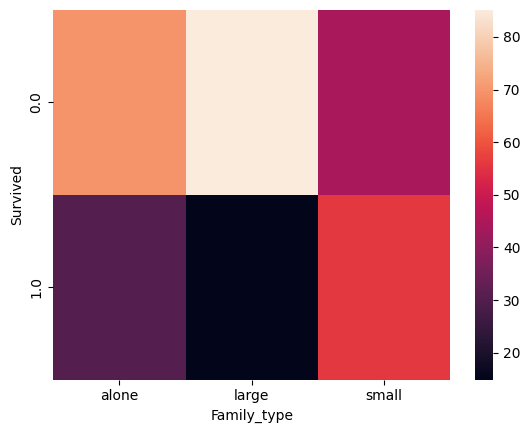

In [34]:
sns.heatmap(pd.crosstab(df2['Survived'],df2['Family_type'],normalize='columns')*100)

In [42]:
# birvariate analysis on survived and name using surname and title(Mr,Mrs)
df2['Surname']=df2['Name'].str.split(',').str.get(0)
df2.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare,Family_size,Family_type,Surname
192,193,1.0,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,3.9271,1,small,Andersen-Jensen
483,484,1.0,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S,9.5875,0,alone,Turkula
111,112,0.0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,7.2271,1,small,Zabour


In [50]:
df2['Title']=df2['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)
df2.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare,Family_size,Family_type,Surname,Title
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,4.095833,2,small,Hirvonen,Mrs.
748,749,0.0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,D30,S,26.550000,1,small,Marvin,Mr.
779,780,1.0,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S,105.668750,1,small,Robert,Mrs.


In [51]:
df2['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.', 'Dona.'], dtype=object)

In [53]:
df2['Title'].replace(
[ 'Rev.', 'Dr.', 'Major.', 'Col.', 'Capt.', 'the',
       'Jonkheer.'],'other'
,inplace=True)
df2['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'other', 'Mme.', 'Ms.',
       'Lady.', 'Sir.', 'Mlle.', 'Dona.'], dtype=object)

In [61]:
df2['Title'].replace(
[ 'Don.','Miss.','Mme.','Ms.','Lady.','Mlle.','Dona.' ],'Miss.'
,inplace=True)
df2['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'other', 'Sir.'], dtype=object)

In [62]:
pd.crosstab(df2['Survived'],df2['Title'],normalize='columns')*100

Title,Master.,Miss.,Mr.,Mrs.,Sir.,other
Survived,,,,,,
0.0,42.5,29.787234,84.332689,20.8,0.0,70.0
1.0,57.5,70.212766,15.667311,79.2,100.0,30.0


In [66]:
# birvariate analysis on survived and cabin
(df2['Cabin'].isnull().sum()/len(df2['Cabin']))*100

77.46371275783041

In [77]:
df2['Cabin'].fillna('M',inplace=True)

In [86]:
df2['Deck']=df2['Cabin'].str[0]
df2.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare,Family_size,Family_type,Surname,Title,Deck
296,297,0.0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,M,C,7.2292,0,alone,Hanna,Mr.,M
111,1003,NaN,3,"Shine, Miss. Ellen Natalia",female,NaN,0,0,330968,7.7792,M,Q,7.7792,0,alone,Shine,Miss.,M
217,218,0.0,2,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,243847,27.0000,M,S,13.5000,1,small,Jacobsohn,Mr.,M
519,520,0.0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,M,S,7.8958,0,alone,Pavlovic,Mr.,M
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,26.5500,0,alone,Bonnell,Miss.,C


In [90]:
pd.crosstab(df2['Deck'],df2['Pclass'])

Pclass,1,2,3
Deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


<Axes: xlabel='Survived'>

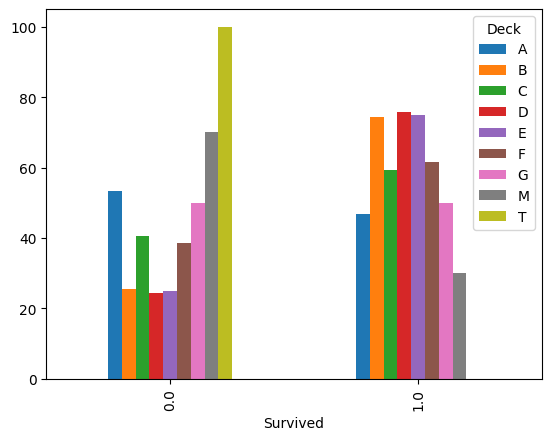

In [94]:
(pd.crosstab(df2['Survived'],df2['Deck'],normalize='columns')*100).plot(kind='bar')

<Axes: xlabel='Deck'>

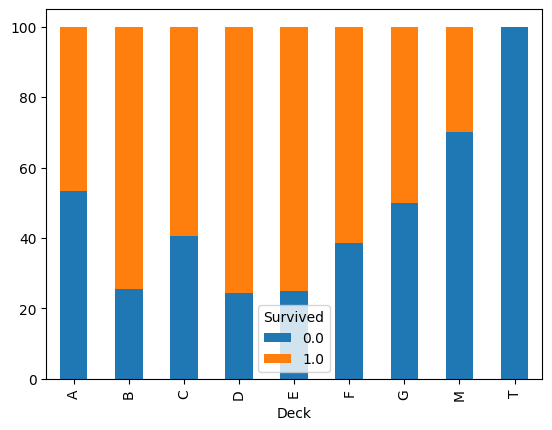

In [101]:
(pd.crosstab(df2['Deck'],df2['Survived'],normalize='index')*100).plot(kind='bar',stacked=True)

### Survived-Pclass(categorical-categorical):
- Most people died on Pclass 3 and Pclass 1 was the most safest class
### Survived-Sex(categorical-categorical):
- Males died more than females
### Survived-Embarked(categorical-categorical):
- People Embarked from C tend to survive more than embarked from other places which shouldn't be the case,maybe there are more females which embarked from C or most people embarked from C belong to Pclass 3
### Survived-fare(categorical-numerical):
- Childs from 1 to 5 survived more
- Adults from 20 to 40 survived less
- Elders from 40 to 80 survived less
### Survived-family_size(categorical-categorical):
- People with large family size died more than alone people than small family size
